# Sistemas Inteligentes 2021/2022

## Mini-projeto 3: Aprendizagem Automática

## Relatório


## Grupo: 51

Número: 56926    Nome: Lucas Pinto   
Número: 56895    Nome: Matilde Silva    
Número: 56941    Nome: Bruno Gonzalez

In [2]:
# Helpers
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


## 1. Processamento dos dados

- Usar o pandas para abrir o ficheiro "train.csv"
- Criação das tabelas e identificação das mesmas

#COPIADO DA PL -Guiao arvores
Como explicado anteriormente, os classificadores do scikit-learn, contudo, não podem usar dados categóricos na matriz de dados, pelo que estes terão que ser binarizados, ou seja cada valor possível de uma variável é transformado numa coluna que pode ter valores 1 ou 0, consoante esse valor ocorra ou não. A função get_dummies() do pandas permite efectuar essa transformação sem problemas dentro de um DataFrame.



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df_cirrose_train = pd.read_csv("train.csv")

col_idxs = [x for x in range(1, 19)]
col_names = np.array(df_cirrose_train.columns)[col_idxs]

X = df_cirrose_train.values[:, col_idxs]
y = df_cirrose_train.values[:, 19]
y = y.astype('int')

dummy_col_names = ['Status', 'Drug', 'Sex',
                   'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

df_cirrose_X = df_cirrose_train[col_names]
df_cirrose_Xdum = pd.get_dummies(df_cirrose_X, columns=dummy_col_names)
col_names_dum = np.array(df_cirrose_Xdum.columns)

Xdum = df_cirrose_Xdum.values

X_train, X_test, y_train, y_test = train_test_split(
    Xdum, y, test_size=0.2, random_state=2)


## 2. Ajustamento dos modelos


### 2.1. Teste de modelos e validação

(remover) Enunciar as várias abordagens testadas para
* Criar modelos
* Validar modelos
* Avaliar a qualidade dos modelos


#COPIADO   das aulas - guiao arvores
Existe naturalmente nesta biblioteca uma classe para ajustar um classificador usando Árvores de Decisão sendo altamente parametrizável, a classe DecisionTreeClassifier.
criterion = entropy - Critério utilizado para medir a qualidade da partição, proporcionada pelo atributo, o ganho de informação (entropy)
max_depth - por defeito é None, mas pode-se escolher um valor inteiro para este parâmetro. Este parâmetro define a profundidade máxima da árvore a gerar.

Vamos então criar uma árvore de decisão com o critério do ganho de informação e deixando os outros parâmetros inalterados. Primeiro é necessário criar o objeto da árvore de decisão, onde se definem os parâmetros necessários. Depois podem-se usar os seguintes métodos:
predict(X) - prevê o valor da classe para os dados X

Incializar o classificador, eventualmente definindo os parâmetros de ajustamento
Ajustar o classificador aos dados usando o método fit(X, y) que recebe uma matriz de dados (X), que deve ser um numpy.array, e um correspondente conjunto de saída etiquetado (y)
Fazer previsões para um conjunto novo de dados usando o método predict(X) em que o método recebe uma matriz de dados e retornará os valores previstos

#avaliar qualidade?
Depois de construido o modelo podemos usá-lo para prever novos exemplos. Neste caso vamos testar com os mesmos dados com que o treinamos e verificar se os resultados são coerentes.

#validar PL Avaliacao de modelos
Para validar o modelo fornecemos novos dados (que não foram vistos pelo modelo) para os quais temos classes. Isto normalmente é feito dividindo o conjunto de dados (neste caso os 150 exemplos do conjunto iris) em duas partes. Uma parte dos dados, designada de conjunto de treino, é usada para treinar o nosso modelo, enquanto os restantes exemplos, formam o conjunto de teste e serão usados para verificar o quão bem o modelo funciona.

O scikit-learn tem uma função train_test_split que mistura (shuffle) o conjunto de dados e divide-o em duas partes. Esta função, por defeito, extrai 75% das linhas do conjunto de dados para o conjunto de treino, com as classes correspondentes. Os restantes 25% dos dados com as respetivas classes constituem o conjunto de teste. Estas percentagens podem ser ajustadas consoante o conjunto de dados que se tem, mas dividir 75%-25% é um boa regra de bolso (rule of thumb).
os primeiros dois argumentos são sempre a matriz dos dados e o vector de classes
test_size - por defeito usa o complemento do train_size ou 0.25 se train_size não for definido, e corresponde à percentagem de pontos a considerar no conjunto de teste
train_size - por defeito usa o complemento do test_size, e corresponde à percentagem de pontos a considerar no conjunto de treino
random_state - controla a aleatoriedade na escolha de pontos, se fixarmos a um valor inteiro qualquer, é possível replicar a mesma divisão dos dados e replicar resultados
e devolve quatro outputs, o conjunto de treino (designemo-lo por X_train) e de teste (X_test) que são matrizes (numpy arrays) com os dados e as classes de treino (y_train) e teste (y_test) que serão vectores (numpy array).

In [18]:
# Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


dt = DecisionTreeClassifier(max_depth=7, min_samples_split=20, min_samples_leaf=10, random_state=2)
dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)

scores = cross_val_score(dt,
                         X=X_train,
                         y=y_train,
                         cv=5
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


CV accuracy:
	0.4716981132075472
	0.41509433962264153
	0.3018867924528302
	0.46153846153846156
	0.40384615384615385
Average CV accuracy: 0.411 +/- 0.060


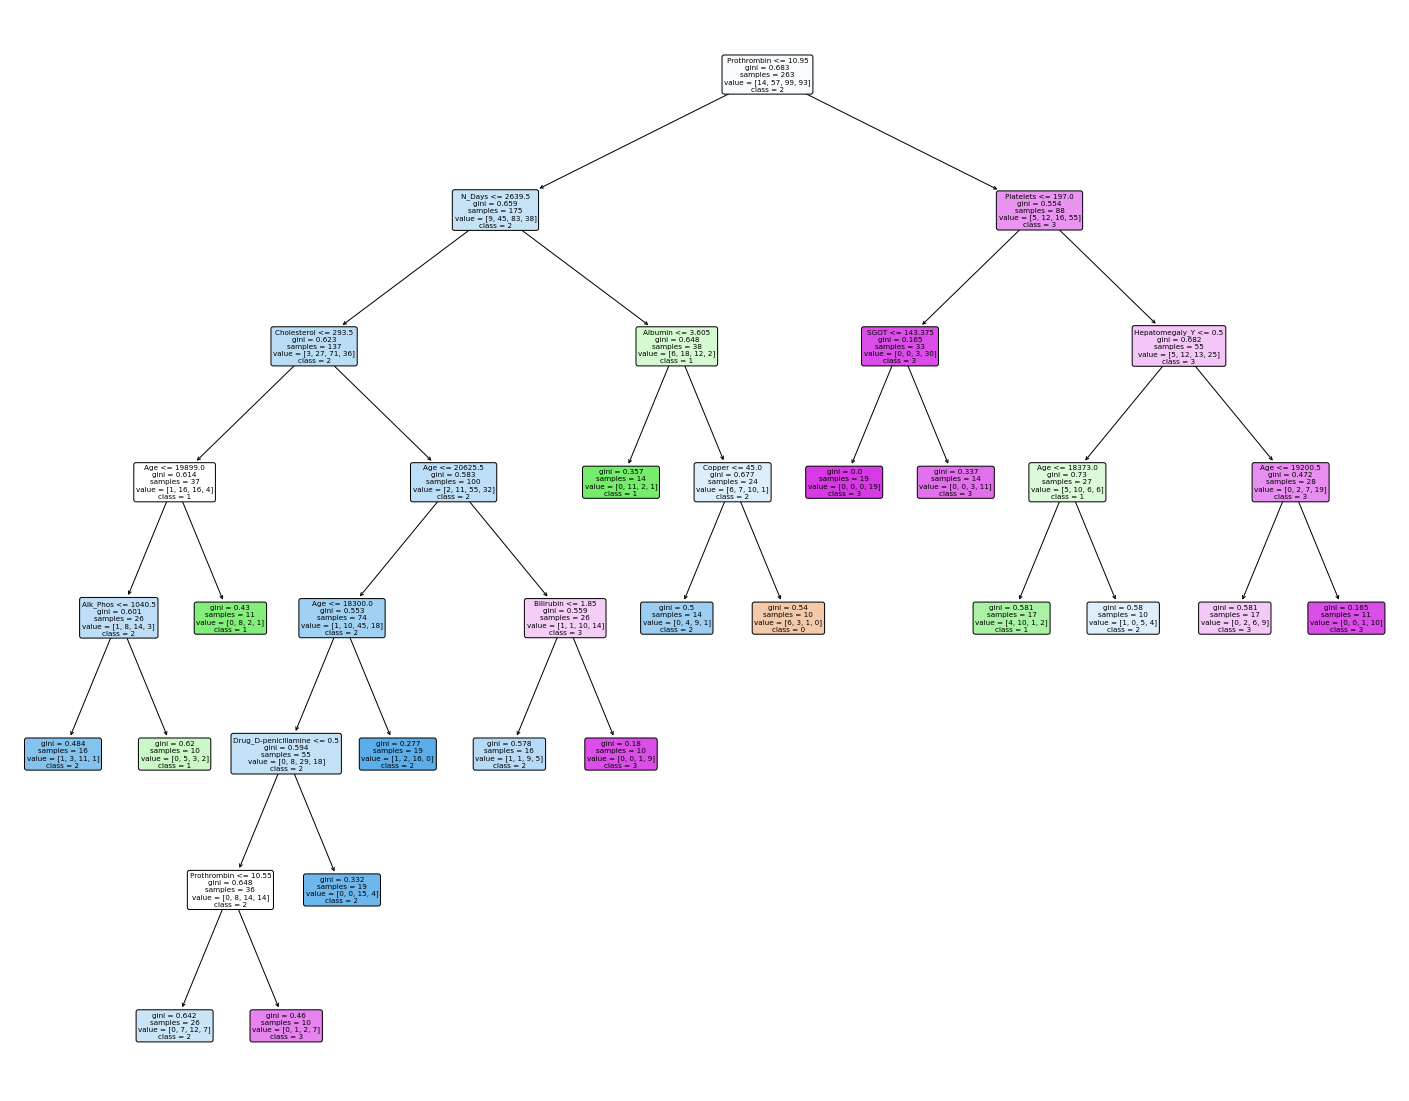

In [31]:
# Visualização da Árvore de Decisão
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=[25,20]) # width, height in inches
plot_tree(dt, 
          feature_names=col_names_dum,
          class_names=[str(x) for x in range(5)],
          filled=True, rounded=True)
plt.show()


In [42]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
standardized_data = scaler.transform(X_train)

m = 0
m_i = 1
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    # knn.fit(standardized_data, y_train)
    # knn_preds = knn.predict(X_test)

    scores = cross_val_score(knn,
                             X=standardized_data,
                             y=y_train,
                             cv=10
                             )
    # print('CV accuracy:', *scores, sep='\n\t')
    mean = np.mean(scores)
    dp = np.std(scores)
    print('Average CV accuracy: i=%i %.3f +/- %.3f' % (i, mean, dp))

    if mean-dp > m:
        m = mean
        m_i = i

print(m, m_i)

knn = KNeighborsClassifier(n_neighbors=m_i)
knn.fit(standardized_data, y_train)


Average CV accuracy: i=1 0.331 +/- 0.057
Average CV accuracy: i=2 0.312 +/- 0.077
Average CV accuracy: i=3 0.369 +/- 0.095
Average CV accuracy: i=4 0.400 +/- 0.073
Average CV accuracy: i=5 0.422 +/- 0.072
Average CV accuracy: i=6 0.419 +/- 0.075
Average CV accuracy: i=7 0.415 +/- 0.071
Average CV accuracy: i=8 0.422 +/- 0.088
Average CV accuracy: i=9 0.407 +/- 0.072
Average CV accuracy: i=10 0.414 +/- 0.077
Average CV accuracy: i=11 0.414 +/- 0.077
Average CV accuracy: i=12 0.403 +/- 0.071
Average CV accuracy: i=13 0.437 +/- 0.073
Average CV accuracy: i=14 0.437 +/- 0.071
Average CV accuracy: i=15 0.422 +/- 0.054
Average CV accuracy: i=16 0.433 +/- 0.044
Average CV accuracy: i=17 0.419 +/- 0.047
Average CV accuracy: i=18 0.418 +/- 0.034
Average CV accuracy: i=19 0.422 +/- 0.047
Average CV accuracy: i=20 0.422 +/- 0.075
Average CV accuracy: i=21 0.422 +/- 0.080
Average CV accuracy: i=22 0.422 +/- 0.068
Average CV accuracy: i=23 0.415 +/- 0.062
Average CV accuracy: i=24 0.434 +/- 0.065
A

KNeighborsClassifier()

### 2.2. Seleção e apresentação do melhor modelo

(remover) Apresentar todos os resultados para cada modelo obtido

* Elencar o critério de selecção
* Apresentar a árvore (se aplicável)
* Discutir os resultados


## 3. Validação do modelo final ajustado com um conjunto de validação independente

(remover) O ficheiro `test.csv` contém um conjunto de dados não usado para treinar o modelo definido no ponto #2. 
* Preparar o data set
* Correr o modelo selecionado como sendo o melhor nestes dados
* Apresentar os resultados para as métricas de validação
* Discutir os resultados alcançados confrontando os resultados com os obtidos anteriormente

## 4. Competição

(remover) Explicar os passos feitos para chegar à solução submetida na competição, tendo em conta:

* A escolha dos parâmetros usados pelos classificadores
* A escolha de atributos mais relevantes para a aprendizagem dos modelos
    

In [43]:
df_cirrose_test = pd.read_csv("test.csv")

col_idxs = [x for x in range(1, 19)]
col_names = np.array(df_cirrose_test.columns)[col_idxs]

dummy_col_names = ['Status', 'Drug', 'Sex',
                   'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

df_cirrose_test_X = df_cirrose_test[col_names]
df_cirrose_test_Xdum = pd.get_dummies(df_cirrose_test_X, columns=dummy_col_names)

Xdum = df_cirrose_test_Xdum.values

scaler = StandardScaler()
scaler.fit(Xdum)
standardized_data = scaler.transform(Xdum)

preds = knn.predict(standardized_data)


# # list(zip(df_cirrose_Xdum.shape, preds))
df_out = pd.DataFrame({'ID': df_cirrose_test['ID'], 'Stage': preds})

df_out.to_csv('submission.csv', index=False)